PCA

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [2]:
#Load Dataset

iris = load_iris ()
x = iris.data
y = iris.target

#standardize data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
x_pca = pca.fit_transform(x_scaled)

#Explained variance
explained_variance = pca.explained_variance_ratio_
print(explained_variance)


[0.72962445 0.22850762]


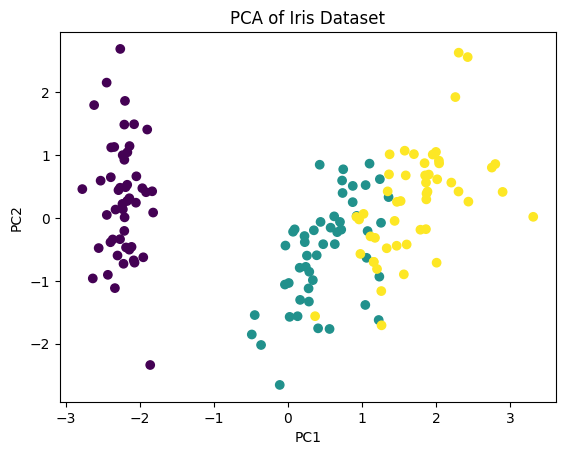

In [5]:
import matplotlib.pyplot as plt

plt.scatter(x_pca[:,0],x_pca[:,1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Iris Dataset')
plt.show()

Non Parametric Regression using Kernel Methods

In [12]:
import numpy as np

#generate data
np.random.seed(0)
X = np.random.rand(0,10,100)
y = np.sin(X) + 0.5 * np.random.rand(100)
X = X.reshape(-1,1)

In [15]:
from sklearn.metrics.pairwise import euclidean_distances

def gaussian_kernel(u):
  return np.exp(-0.5 * u**2) / np.sqrt(2*np.pi)

def kernel_regression(x_train, y_train,x_eval,h=0.5):
  y_pred = []
  for x0 in x_eval:
    distance = (x0 - x_train)/h
    weights = gaussian_kernel(distance)
    y_hat = np.sum(weights * y_train)/np.sum(weights)
    y_pred.append(y_hat)
  return np.array(y_pred)

#predict
y_pred = kernel_regression(X,y,X,h=0.5)


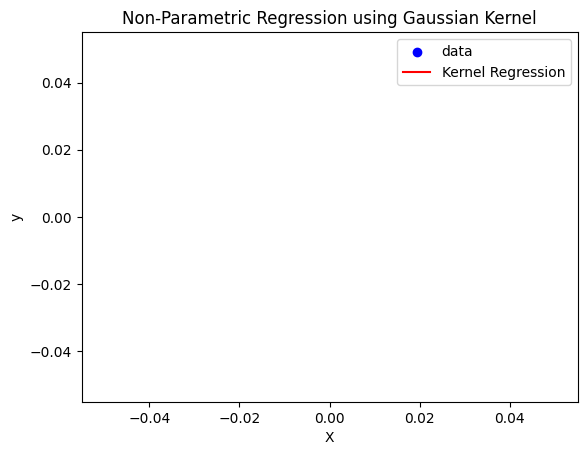

In [18]:
plt.scatter(X,y, color = 'blue', label='data')
plt.plot(X,y_pred, color='red', label='Kernel Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Non-Parametric Regression using Gaussian Kernel')
plt.legend()
plt.show()